In [104]:
theta_fit <- c(0.30, 0.35, 0.39, 0.41, 0.45)
y_fit <- c(0.5, 0.32, 0.40, 0.35, 0.60)

mu <- 0.5
var <- 0.25

corr_y <- function(theta1, theta2) {
  (1 + 15 * abs(theta1 - theta2)) * exp(-15 * abs(theta1 - theta2))
}


theta_grid <- seq(0.25, 0.5, 0.005)


In [105]:

conditionals <- function(mu, var, theta_grid, theta_fit, y_fit, corr_y) {
  corr_mat_grid <- outer(theta_grid, theta_grid, corr_y)
  corr_mat_fit <- outer(theta_fit, theta_fit, corr_y)
  corr_mat_fg <- outer(theta_grid, theta_fit, corr_y)

  sigma_grid <- var * corr_mat_grid
  sigma_fit <- var * corr_mat_fit
  sigma_fg <- var * corr_mat_fg

  mu_cond <- mu + sigma_fg %*% solve(sigma_fit) %*% (y_fit - mu)
  sigma_cond <- sigma_grid - sigma_fg %*% solve(sigma_fit) %*% t(sigma_fg)

  var_cond <- diag(sigma_cond)
  # Ensure non-negative variances (may be due to numerical issues)
  var_cond[var_cond < 0] <- 0
  sd_cond <- sqrt(var_cond)

  return (list(mu_cond, sd_cond))
}


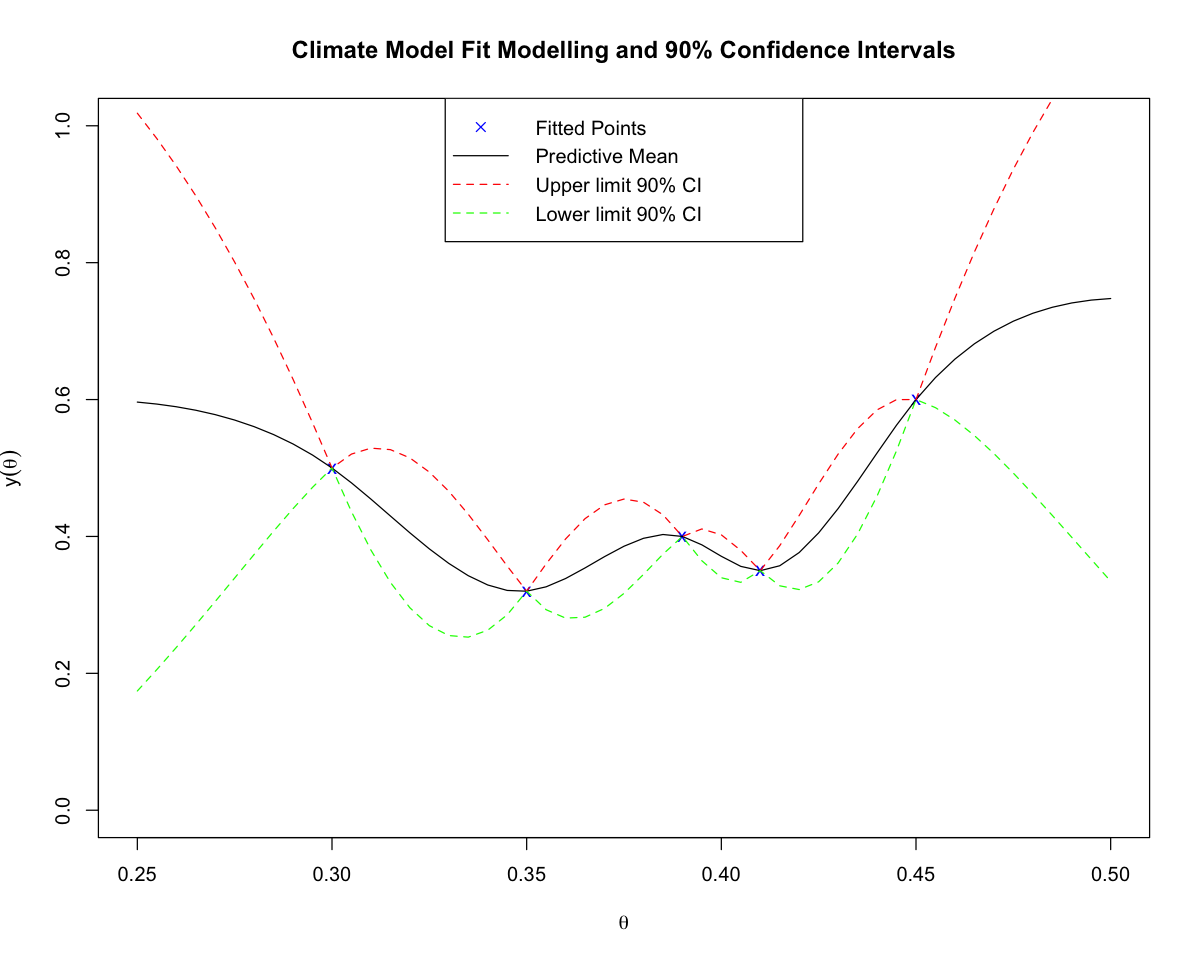

In [106]:

conds <- conditionals(mu, var, theta_grid, theta_fit, y_fit, corr_y)
mu_cond <- conds[[1]]
sd_cond <- conds[[2]]

upper90 <- mu_cond + 1.645 * sd_cond
lower90 <- mu_cond - 1.645 * sd_cond

par(bg="white")
options(repr.plot.width = 10, repr.plot.height = 8)
plot(theta_fit, y_fit, type="p", pch = "x", col="blue", xlim=c(0.25, 0.5), ylim=c(0, 1),
     xlab=expression(theta), ylab=expression(y(theta)))
lines(theta_grid, mu_cond)
lines(theta_grid, upper90, col="red", lty=2)
lines(theta_grid, lower90, col="green", lty = 2)
title("Climate Model Fit Modelling and 90% Confidence Intervals")
legend("top", legend=c("Fitted Points", "Predictive Mean", "Upper limit 90% CI", "Lower limit 90% CI"),
       col=c("blue", "black", "red", "green"), pch=c(4, NA, NA, NA), lty=c(NA, 1, 2, 2))



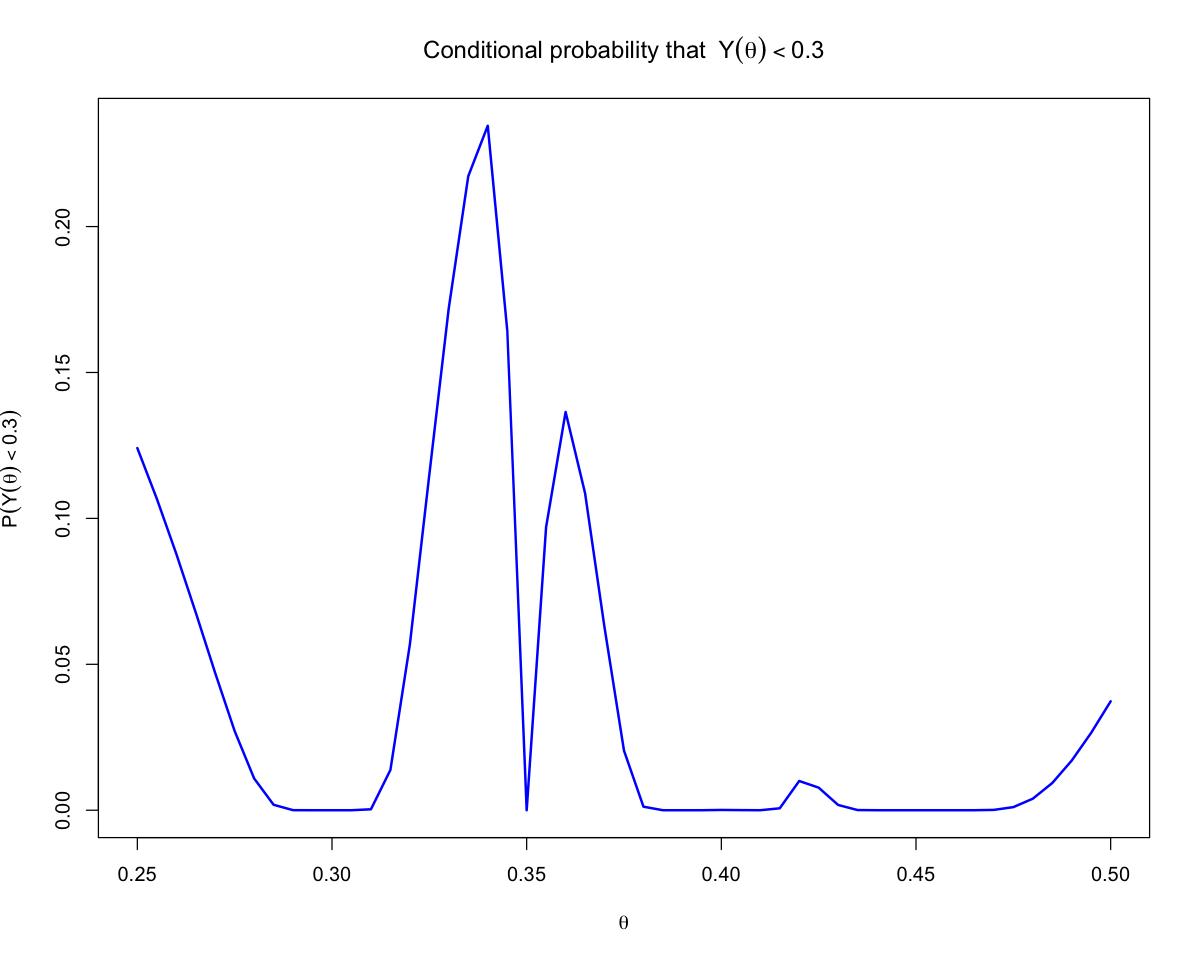

In [107]:

prob_below_030 <- pnorm(0.3, mean = mu_cond, sd = sd_cond)

par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 8)
plot(theta_grid, prob_below_030, type = "l", lwd = 2, col = "blue",
     xlab = expression(theta),
     ylab = expression(P(Y(theta) < 0.30)))
title(bquote("Conditional probability that " ~ Y(theta) < 0.3))


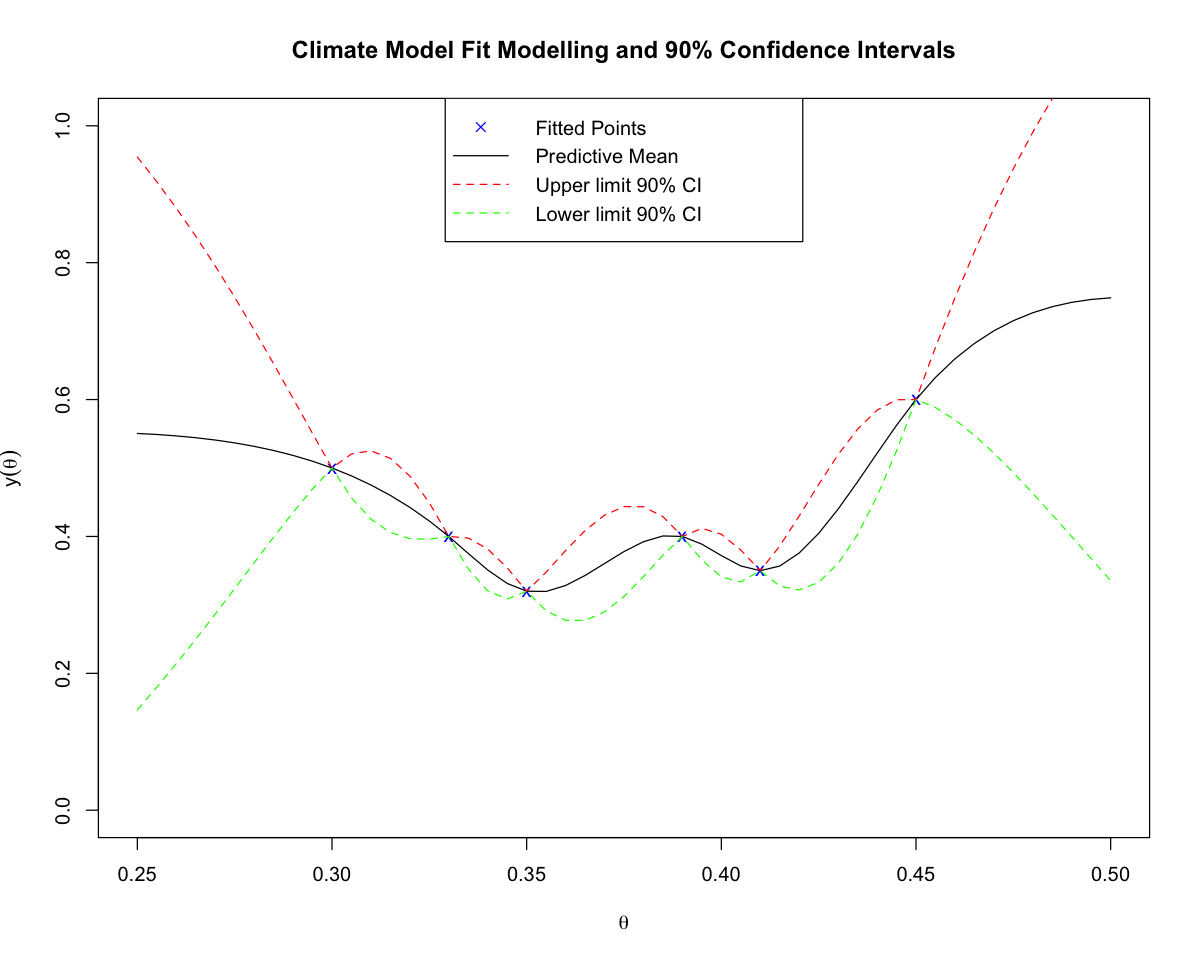

In [108]:
theta_fit <- c(0.30, 0.33, 0.35, 0.39, 0.41, 0.45)
y_fit <- c(0.5, 0.40, 0.32, 0.40, 0.35, 0.60)

conds <- conditionals(mu, var, theta_grid, theta_fit, y_fit, corr_y)
mu_cond <- conds[[1]]
sd_cond <- conds[[2]]

upper90 <- mu_cond + 1.645 * sd_cond
lower90 <- mu_cond - 1.645 * sd_cond


par(bg="white")
options(repr.plot.width = 10, repr.plot.height = 8)
plot(theta_fit, y_fit, type="p", pch = "x", col="blue", xlim=c(0.25, 0.5), ylim=c(0, 1),
     xlab=expression(theta), ylab=expression(y(theta)))
lines(theta_grid, mu_cond)
lines(theta_grid, upper90, col="red", lty=2)
lines(theta_grid, lower90, col="green", lty = 2)
title("Climate Model Fit Modelling and 90% Confidence Intervals")
legend("top", legend=c("Fitted Points", "Predictive Mean", "Upper limit 90% CI", "Lower limit 90% CI"),
       col=c("blue", "black", "red", "green"), pch=c(4, NA, NA, NA), lty=c(NA, 1, 2, 2))



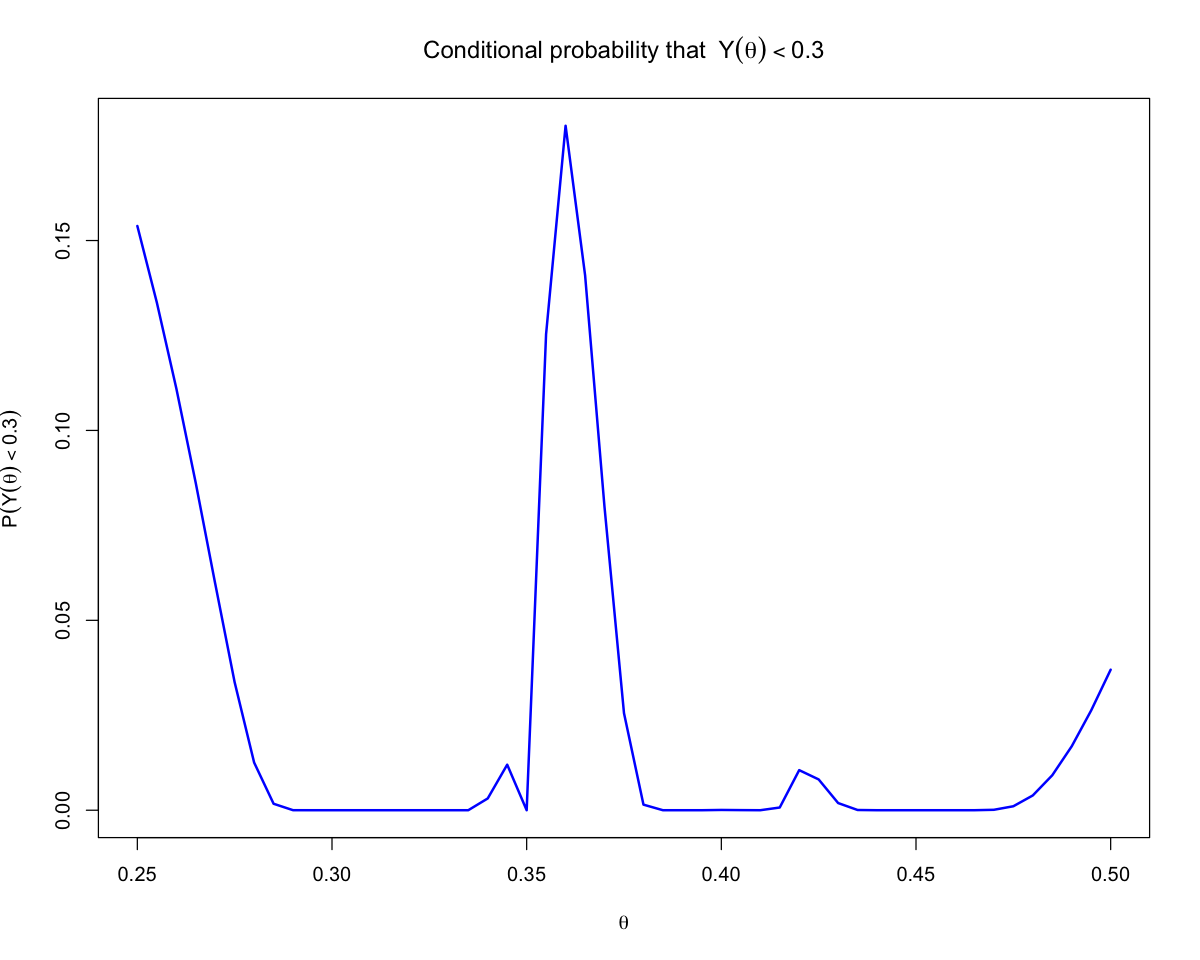

In [109]:
prob_below_030 <- pnorm(0.3, mean = mu_cond, sd = sd_cond)

par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 8)
plot(theta_grid, prob_below_030, type = "l", lwd = 2, col = "blue",
     xlab = expression(theta),
     ylab = expression(P(Y(theta) < 0.30)))
title(bquote("Conditional probability that " ~ Y(theta) < 0.3))
